In [1]:
import pickle
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# from sklearn.decomposition import PCA


with open("data/mol_bits.pkl", "rb") as fh:
    data = pickle.load(fh)

# Extracting unique features for sparse matrix dims
all_feats = set()
for feats_set in data.values():
    all_feats.update(feats_set)

n_feats = max(all_feats) + 1  # 0-based indexing

# Creating sparse matrix mol feats
rows, cols = [], []
for i, (uniprot_id, feats_set) in enumerate(data.items()):
    rows.extend([i] * len(feats_set))
    cols.extend(feats_set)

mol_feats = csr_matrix((np.ones(len(rows)), (rows, cols)), shape=(len(data), n_feats))
molecule_ids = list(data.keys())


activ = pd.read_csv("data/activity_train.csv", header=None)
activ.columns = ["uniprot_id", "mol_id", "activity"]
prot_ids = activ["uniprot_id"].unique().tolist()

In [35]:
pd.read_csv("data/activity_train.csv", header=None)

,0,1,2
0,O14842,CHEMBL2022243,4
1,O14842,CHEMBL2022244,6
2,O14842,CHEMBL2022245,2
3,O14842,CHEMBL2022246,1
4,O14842,CHEMBL2022247,4
...,...,...,...
135706,Q9Y5Y4,CHEMBL4214909,6
135707,Q9Y5Y4,CHEMBL4218012,2
135708,Q9Y5Y4,CHEMBL4217503,7
135709,Q9Y5Y4,CHEMBL4204359,8


In [34]:
pd.read_csv("data/activity_train.csv", header=None).groupby(0).size()

0
O14842     124
O43193      97
O43613    1574
O43614    1732
O95665     117
          ... 
Q9UBY5      67
Q9UKP6     324
Q9Y5N1    3902
Q9Y5X5      73
Q9Y5Y4     949
Length: 144, dtype: int64

In [38]:
pd.DataFrame(
    mol_feats[:11, :11].todense(),
    index=molecule_ids[:11],
    columns=[f"feat_{i}" for i in range(11)],
)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
CHEMBL2022243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CHEMBL2022252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
activ = activ.pivot(index="mol_id", columns="uniprot_id", values="activity").fillna(0)
activ = csr_matrix(activ)

## movies = proteins, users = molecules 

- U: user (molecule) to concept similarity matrix
- s: strength of each concept
- V: movie (protein) to concept similarity matrix

In [5]:
# sparse matrix with the activity values
from scipy.linalg import svd

U, s, V = svd(activ.todense(), full_matrices=False)

## collaborative filtering

- estimate activity of molecules with proteins, based on their similarity to other molecules that have known activities with said proteins

<Axes: ylabel='Frequency'>

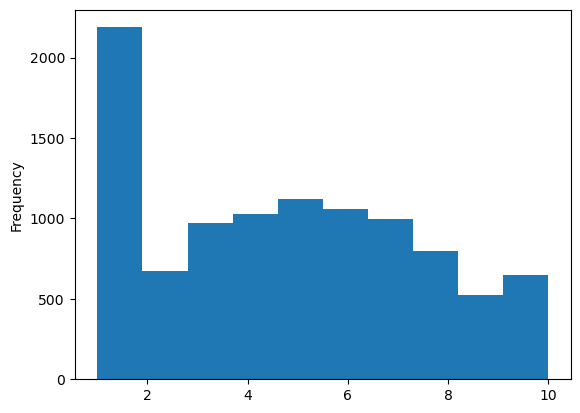

In [42]:
pd.read_csv("data/activity_train.csv", header=None).sample(10_000)[2].plot.hist(bins=10)